# Working bits from bpstats09pg


## moving to sqlite after trouble with queries and sequences in postgresql

https://docs.sqlalchemy.org/en/14/dialects/sqlite.html#module-sqlalchemy.dialects.sqlite.pysqlite

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

use %%black to format cell

running from fedora and making change to see if push works with flatboy
can't seem to get gitlab to show bubba as an author


In [3]:
import dateutil
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy import select
from sqlalchemy.dialects.sqlite import DATETIME as DT
import matplotlib.pyplot as plt
# import seaborn as sb
from matplotlib import cbook, dates
from icecream import ic
#from matplotlib.ticker import Formatter
import mplcursors
#%matplotlib widget
# this gives seperate window qt widget for figures
# %matplotlib qt5 
# %load_ext blackcellmagic
eng = create_engine("sqlite:////data/sqlite/vitals.db")
myconn = eng.connect()

## Blood sugar line plot

In [4]:
myconn

/tmp/ipykernel_28502/2424762569.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis='both', )


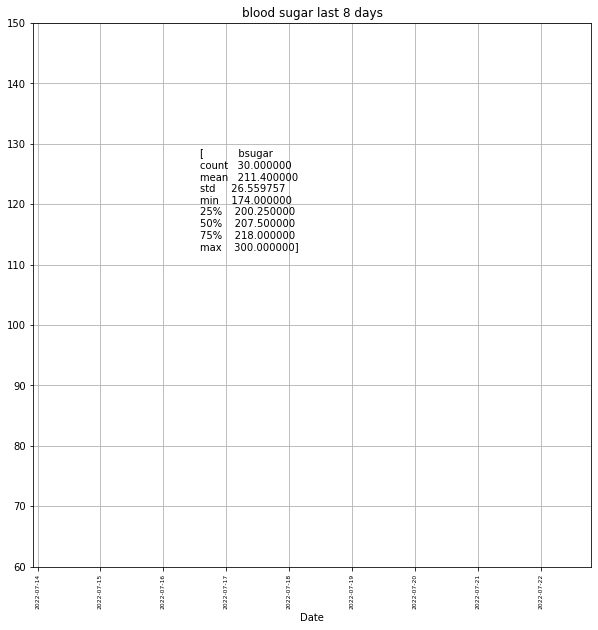

In [5]:
#  this one working and showing the variable mystats n
# never got cursor to work so added mplcursors lib
# get data
sugeightdays = "SELECT bsdate,bsugar FROM qtsugar WHERE bsdate > (SELECT date('now','-8 day'))"
sugar8days = pd.read_sql_query(sugeightdays, myconn, parse_dates = "bsdate")
# start setting up figure
mylegend = "7 days stats "
mystats = sugar8days.describe(include='int')
sugar8days=sugar8days.sort_values("bsdate")
fig3, ax3 = plt.subplots()
plt.ylim(60,150)
ax3.set_xlabel('Date')
plt.title('blood sugar last 8 days')
ax3.annotate([mystats], xy=(200, 380), xycoords='figure points')
plt.setp(ax3.get_xticklabels(), rotation = 90, fontsize=6)
#ax3.set_xticklabels(sugar8days.bsdate, rotation=90, fontsize=6)
plt.grid(b=True, which='both', axis='both', )
fig3.set_figwidth(10)
fig3.set_figheight(10)
lines = ax3.plot(sugar8days.bsdate , sugar8days.bsugar, marker='o', linestyle='dashed' )
mplcursors.cursor(lines) # or just mplcursors.cursor()



In [7]:
sugar8days.describe()

,bsugar
count,30.000000
mean,211.400000
std,26.559757
min,174.000000
25%,200.250000
50%,207.500000
75%,218.000000
max,300.000000


In [8]:
sugar8days.pdf

AttributeError: 'DataFrame' object has no attribute 'pdf'

## Blood sugar line plot and table

In [ ]:
# this one now working and showing 2 subplots Saturday, June 5, 2021 10:57:39 AM EDT
# never got cursor to work so added mplcursors lib
# get data
sugeightdays = (
    "SELECT bsdate,bsugar FROM qtsugar WHERE bsdate > (SELECT date('now','-8 day'))"  # pgsql
)
sugar8days = pd.read_sql_query(sugeightdays, myconn, parse_dates="bsdate")
fig3, ax3, = plt.subplots(1, 2)
plt.subplot(1, 2, 1)
# start setting up figure
mylegend = "7 days stats "
mystats = sugar8days.describe()
plt.ylim(60, 150)
ax3[0].set_xlabel("Date")
plt.title("blood sugar last 8 days")
ax3[0].annotate([mystats], xy=(200, 380), xycoords="figure points")
plt.setp(ax3[0].get_xticklabels(), rotation=90, fontsize=6)
# ax3.set_xticklabels(sugar8days.bsdate, rotation=90, fontsize=6)
plt.grid(
    b=True, which="both", axis="both",
)
fig3.set_figwidth(15)
fig3.set_figheight(10)
# thetable = pd.plotting.table(fig3, sugar8days, colLabels= sugar8days.columns )
lines = ax3[0].plot(
    sugar8days.bsdate, sugar8days.bsugar, marker="o", linestyle="dashed"
)
plt.subplot(1, 2, 2)

plt.table(
    cellText=sugar8days.values,
    colWidths=[0.25] * len(sugar8days.columns),
    rowLabels=None,
    colLabels=sugar8days.columns,
    cellLoc="center",
    rowLoc="center",
    loc="center",
)
mplcursors.cursor(lines)  # or just mplcursors.cursor()
plt.show()

## Blood pressure

In [ ]:
bpsevendays = "SELECT bpdate ,bpsys AS systolic, bpdia AS diastolic, bphr AS pulse from  vsigns_bp where bpdate > (SELECT date('now','-8 day'))"
bp7days = pd.read_sql_query(bpsevendays, myconn, parse_dates = "bpdate")

x = np.arange(len(bp7days))  # the label locations
width = 0.35  # the width of the bars

# color picker gpick
fig , ax = plt.subplots()
rects1 = ax.bar(x - width/2, bp7days.systolic, width, label='systolic', facecolor='#00388F')
rects2 = ax.bar(x + width/2, bp7days.diastolic, width, label='diastolic', facecolor='#8F5600')
rects3 = ax.bar(x + width, bp7days.pulse, width, label='pulse', facecolor='#638F00')
ax.axhline(y=120, color='#00388F')
ax.axhline(y=80, color='#8F5600')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('120/80 = perfect')
ax.set_title('Blood press 7 days')
ax.set_xticks(x)
ax.set_xticklabels(bp7days.bpdate, rotation=90, fontsize=6)
ax.legend()

ax.bar_label(rects1, label_type='center', color='#EEEED0')
ax.bar_label(rects2, label_type='center')
ax.bar_label(rects3, label_type='center')
plt.rc('xtick', labelsize=6)
fig.set_figheight(10)
mplcursors.cursor(rects3)
mplcursors.cursor(rects2)
plt.show()

In [ ]:
bp7days.describe()

## Weight line plot and table

In [ ]:
# editied in kate for new query for weight (fatty table)
# never got cursor to work so added mplcursors lib
# get data
wtdta = "select ftime, weight from qfatty where ftime > (SELECT date('now','-14 day'))"
wtdata = pd.read_sql_query(wtdta, myconn, parse_dates = "Time")
wtdata.rename(columns = {'ftime':'Time', 'weight':'Weight' }, inplace = True)
   
fig4, ax4, = plt.subplots(1, 2)
plt.subplot(1,2,1)
# start setting up figure
mylegend = "7 days stats "
mystats = wtdata.describe(include='float')
plt.ylim(230,260)
ax4[0].set_xlabel('Date')
plt.title('weight plot')
ax4[0].annotate([mystats], xy=(200, 380), xycoords='figure points')
plt.setp(ax4[0].get_xticklabels(), rotation = 90, fontsize=6)
# ax4.set_xticklabels(wtdata.bsdate, rotation=90, fontsize=6)
plt.grid(b=True, which='both', axis='both', )
fig4.set_figwidth(15)
fig4.set_figheight(10)
# thetable = pd.plotting.table(fig4, wtdata, colLabels= wtdata.columns )
lines = ax4[0].plot(wtdata.Time , wtdata.Weight, marker='o', linestyle='dashed' )
plt.subplot(1,2,2)
plt.table(cellText=wtdata.values,colWidths = [0.25]*len(wtdata.columns),
          rowLabels= None ,
          colLabels=wtdata.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='center')
mplcursors.cursor(lines) # or just mplcursors.cursor()
plt.show()


In [ ]:
wtdta = "select ftime, weight from qfatty "
wtdata = pd.read_sql_query(wtdta, myconn, parse_dates = "ftime")

In [ ]:
# 2021-07-11 09:06:00
from datetime import datetime
import dateutil
dt = "7/14/2021 4:34 PM"
# dt = datetime.now()
# dt = DT(dt, "localtime" )
dt = datetime.strptime(dt, '%m/%d/%Y %I:M %p')

In [ ]:
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object

In [ ]:
# d='10:23:34 PM'
#d = '7/14/2021 4:34 PM'
#pd.to_datetime(d,'%m/%d/%Y %H:%M')
wtdata.describe( )


In [ ]:
wtdata.ftime.max() - wtdata.ftime.min()

In [ ]:
wtdata.weight.max() - wtdata.weight.min()

In [ ]:
19/96

In [ ]:
wtdata = pd.read_csv("/home/rfile/motog3/Bob - Export Data 7-11-2021 ~ 7-17-2021.csv")
wtdata.rename(columns={"Time": "ftime"}, inplace=True)
# wtdata.ftime = pd.to_datetime(wtdata.ftime, format="%m/%d/%YT%H:%M")
wtdata.ftime = pd.to_datetime(wtdata.ftime)



In [ ]:
wtdata.ftime

In [ ]:
for t in wtdata.ftime:
    t = datetime.strptime(t,"%m/%d/%Y %I:%M %p")
    wtdata.replace(wtdata.ftime, t)

In [ ]:
wtdata.loc[0]

In [ ]:
wtdata.ftime

## Barplots averages for sugar

In [ ]:
sugnext8 = "SELECT bsdate,bsugar FROM qtsugar WHERE bsdate < (SELECT date('now','-8 day')) and bsdate > (SELECT date('now' , '-16 day'))"
sugar8next = pd.read_sql_query(sugnext8, myconn, parse_dates = "bsdate")

In [ ]:
sugeightdays = "SELECT bsdate,bsugar FROM qtsugar WHERE bsdate > (SELECT date('now','-8 day'))"
sugar8days = pd.read_sql_query(sugeightdays, myconn, parse_dates = "bsdate")

In [ ]:
sugtoday = "SELECT bsdate,bsugar FROM qtsugar WHERE bsdate = (SELECT date('now', '-1 day'))"
sugartoday = pd.read_sql_query(sugeightdays, myconn, parse_dates = "bsdate")

In [ ]:



sugonedays = "SELECT bsdate,bsugar FROM qtsugar WHERE bsdate >= (SELECT date('now', '-24 hours'))" 
sugar1days = pd.read_sql_query(sugonedays, myconn, parse_dates = "bsdate")





# Draw a vertical bar chart

plot = sugar1days.plot.bar(x="bsdate", y="bsugar", title="sugar 24 hours")

plt.tight_layout()
plt.show()

In [ ]:
sugar1days